In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import thermal_property_calculator as tpc
import dissipation as dis
import scipy.special as sp
from scipy.optimize import  fsolve
import scipy.integrate as integrate
import seaborn as sns
import matplotlib.colors as pltc
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.style.use(r"C:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Lib\site-packages\matplotlib\mpl-data\matplotlibrc")

In [3]:
k_b = 1.380649*10**(-23) # J / K
h_bar = 1.054571*10**(-34) # J s
N_A = 6.022*10**(23)

In [4]:
data_fe = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\CrSBr\specific_heat_feps3.txt", delimiter=' ')
T_fe = data_fe[:, 0]
C_fe = data_fe[:, 1]
T_db_fe, T_ei_fe, x_fe, n_fe = 236, 523, 0.54, 5

In [5]:
TN_feps = 118 # K
J = TN_feps*k_b*np.log(2+np.sqrt(3))/2 # J
mu_0 = 4*np.pi*10**(-7) # T m / A
H_E_feps = 69/mu_0 # A / m
H_A_feps = 138/mu_0 # A / m
a_feps = 2*(5.94 + 10)/2 * 10**(-10) # also made up (well not made up but you know)
J_feps = 2
g_feps = 4.54
n_feps = 2.22*10**27
v_feps = 3823
thickness = 45*10**(-9)


r = 5*10**(-6)
mu = 5
nu = 0.304
E = 103*10**9
rho_=3375

In [6]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))

In [7]:
c_db = tpc.c_debye(T, T_db_fe) * n_fe * N_A
c_ei = tpc.c_einstein(T, T_ei_fe) * n_fe * N_A
c_cb = tpc.c_comb(T, T_db_fe, T_ei_fe, x_fe, n_fe)

In [8]:
if False:
    c_is = tpc.c_ising(T, TN_feps, 1)
    np.savetxt('c_ising_T118.csv', c_is, delimiter=',')
c_is = np.loadtxt('c_ising_T118.csv', delimiter=',')

In [9]:
c_mag = tpc.c_magnon(T, TN_feps, H_E_feps, H_A_feps, J_feps)

c_magnon -> Temperature step: 99.0

c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\thermal_property_calculator.py:264: RuntimeWarning: divide by zero encountered in reciprocal
  return (2*J + 1)/(2*J)*(np.tanh((2*J + 1)*x/(2*J)))**(-1) - 1/(2*J)*(np.tanh(x/(2*J)))**(-1)
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\Theory\thermal_property_calculator.py:264: RuntimeWarning: invalid value encountered in subtract
  return (2*J + 1)/(2*J)*(np.tanh((2*J + 1)*x/(2*J)))**(-1) - 1/(2*J)*(np.tanh(x/(2*J)))**(-1)
c:\Users\alvar\PycharmProjects\nanomechanical_magnetic_resonators\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


c_magnon -> Temperature step: 200.07599999999999


In [10]:
c_M = c_is + c_mag
c_V = c_cb + c_M
c_v_=c_V*(1000/183)

In [11]:
data_kappa_fe = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\kappa_feps3.csv", delimiter=' ')
T_kappa_fe = data_kappa_fe[:, 0]
kappa_fe = data_kappa_fe[:, 1]
data_kappa_log = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\kappa_feps_log.csv", delimiter=' ')
T_kappa_log = data_kappa_log[:, 0]
kappa_log = data_kappa_log[:, 1]
kappa_fe_exp = np.interp(T, T_kappa_log, kappa_log)
kappa = kappa_fe_exp

In [12]:
data_alfa_fe = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\alpha_feps3.csv", delimiter=' ')
data_kappa_fe = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\kappa_feps3.csv", delimiter=' ')
T_alfa_fe = data_alfa_fe[:, 0]
alfa_fe = data_alfa_fe[:, 1]
alfa_FE = np.interp(T,T_alfa_fe,alfa_fe)*3*10**(-5)

beta_T = 1.14*10**(-11) # Pa
gamma_E = 1.798
rho = 18443 # mol/m^3
alpha = beta_T*rho*(gamma_E*c_cb + 4*gamma_E*(c_mag + c_is))

In [13]:
data = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\dissipation_feps3.csv", delimiter=' ')
T_data = data[:, 0]
diss_data = data[:, 1]

data_f = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

In [14]:
Q_RZ_ANISOTROPIC = []
f_kr_kz = [1,1/300,1/800]
for i in range(len(f_kr_kz)):
    #f = 1 / (2*i**2+1)
    #f_kr_kz.append(f)
    Q_RZ_ANISOTROPIC.append(dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa*f_kr_kz[i], kappa, alpha, w0,200))

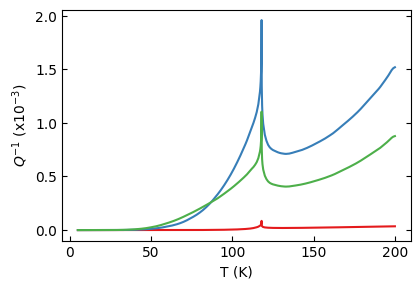

In [15]:
cmap = plt.get_cmap('viridis')
norm = pltc.Normalize(vmin=f_kr_kz[0], vmax=1/f_kr_kz[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(1,1,figsize=(4.5,3), sharey=True)
for i in range(len(f_kr_kz)):
#ax.plot(T, Q_rz*1000,label='iso')
    ax.plot(T,Q_RZ_ANISOTROPIC[i]*1000)#, color=cmap(norm(1/f_kr_kz[i])))
#ax.scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

In [16]:
Q_RZ_ANISOTROPIC2 = []
f_kr_kz2 = []
for i in range(20):
    f = 1 / (2*i**2+1)
    f_kr_kz2.append(f)
    Q_RZ_ANISOTROPIC2.append(dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa*f_kr_kz2[i], kappa, alpha, w0,200))

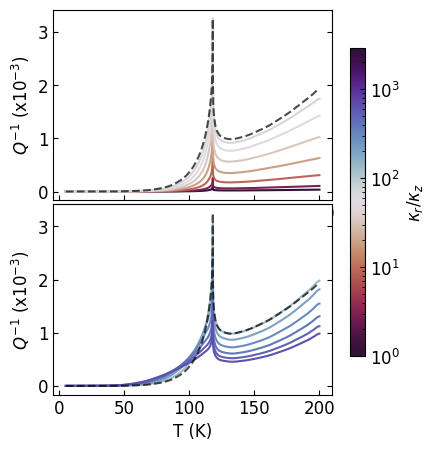

In [29]:
cmap = plt.get_cmap('twilight_shifted_r')
plt.rcParams['font.size'] = 12
norm = pltc.LogNorm(vmin=f_kr_kz2[0], vmax=1/f_kr_kz2[-1]*4)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
N = 7
fig, ax = plt.subplots(2,1,figsize=(4.5,5), sharey=True)
for i in range(len(f_kr_kz2)):
#ax.plot(T, Q_rz*1000,label='iso')
    if i<N:
        ax[0].plot(T,Q_RZ_ANISOTROPIC2[i]*1000, color=cmap(norm(1/f_kr_kz2[i])))
    if i==N:
        ax[0].plot(T,Q_RZ_ANISOTROPIC2[i]*1000, color='k', linewidth=1.5,zorder=10,alpha=0.7,linestyle='--')
        ax[1].plot(T,Q_RZ_ANISOTROPIC2[i]*1000, color='k',linewidth=1.5,zorder=10,alpha=0.7,linestyle='--')
    elif (i>N)and(i%2==0):
        ax[1].plot(T,Q_RZ_ANISOTROPIC2[i]*1000, color=cmap(norm(1/f_kr_kz2[i])))
#ax.scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax[0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[1].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[1].set_xlabel('T (K)')
plt.subplots_adjust(wspace=0, hspace=0.02)
plt.colorbar(sm, ax=ax[:],label=r'$\kappa_r/\kappa_z$',shrink=0.8)
plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology (1)\_TUDelft\5. PhD\A1. Projects\1. TED\Figures\Anisotropic.pdf',transparent=True)
plt.show()

In [146]:
Q_RZ_ANISOTROPIC = []
f_kr_kz = []
for i in range(20):
    f = 1 / (2*i**2+1)
    f_kr_kz.append(f)
    Q_RZ_ANISOTROPIC.append(dis.dissipation_kz_kr_anis(thickness, r, nu, E, rho_, T, c_v_, kappa*f_kr_kz[i], kappa, alpha, w0,200))

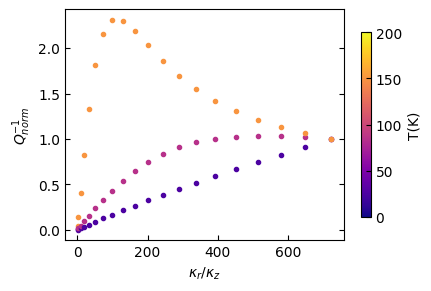

In [147]:
Ts = [25,85,150]
TsIn = [20,80,153] 
cmap = plt.get_cmap('plasma')
norm = pltc.Normalize(vmin=0, vmax=200)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(1,1,figsize=(4.5,3), sharey=True)
for i in range(len(f_kr_kz)):
    ax.scatter(1/f_kr_kz[i],Q_RZ_ANISOTROPIC[i][20]/Q_RZ_ANISOTROPIC[-1][20], color=cmap(norm(Ts[0])), marker='.')
    ax.scatter(1/f_kr_kz[i],Q_RZ_ANISOTROPIC[i][80]/Q_RZ_ANISOTROPIC[-1][80], color=cmap(norm(Ts[1])), marker='.')
    ax.scatter(1/f_kr_kz[i],Q_RZ_ANISOTROPIC[i][153]/Q_RZ_ANISOTROPIC[-1][153], color=cmap(norm(Ts[2])), marker='.')
ax.set_ylabel(r'$Q^{-1}_{norm}$ ')
ax.set_xlabel(r'$\kappa_r/\kappa_z$')
cbar = fig.colorbar(sm, ax=ax, label=r'T(K)', shrink=0.8)
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

Until here I wass just plugging in the resonant frequency and assuming alpha and beta to be the ones corresponding to zero tension. But that is not okay. So now I will code it such that for every case I get teh proper calculation of the tension, alpha and beta. This requires a fitting of the resonant frequency or just ignoring the tensiona accumulated from 300K to 200K.

In [148]:
data_f = np.genfromtxt(r"C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\data\FePS3\alpha_si.csv", delimiter=' ')
T_data_alpha_si = data_f[:, 0]
data_alpha_si = data_f[:, 1]*10**-5

alfa_si = np.interp (T, T_data_alpha_si, data_alpha_si)
alpha_fesi = alpha - alfa_si

def alpha_funct(temper):
    return np.interp(temper,T, alpha/3)

def alpha_fesi_funct(temper):
    return np.interp(temper,T, alpha_fesi/3)

In [149]:
T1 = np.linspace(5, 108, num=109-5).astype(int)
T2 = np.linspace(110, 128, num=50)
T3 = np.linspace(128, 200, num=(201-128)).astype(int)
T_integrate = np.concatenate((T1, T2, T3))
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
np.savetxt('integral_alpha.csv', integral_alpha, delimiter=',')
np.savetxt('T_integral_alpha.csv', T_integrate, delimiter=',')

C:\Users\alvar\AppData\Local\Temp\ipykernel_6544\2698966372.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\alvar\AppData\Local\Temp\ipykernel_6544\2698966372.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])


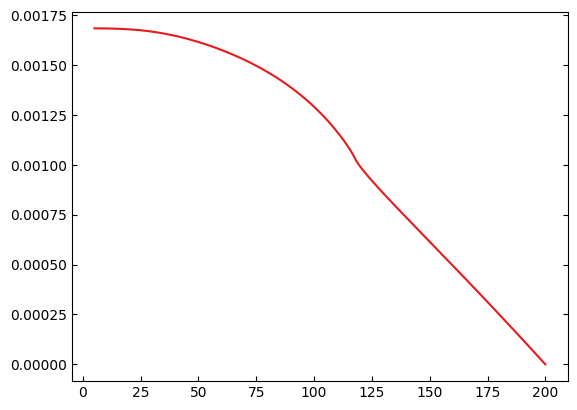

In [150]:
plt.plot(T_integrate,-integral_alpha)

In [151]:
pretension = 6.85 # from previous analysis of the pretension in thermal_properties_FEPS.ipynb

Q_RZ_TENSION_ANISOTROPIC = []
f_kr_kz = []
for i in range(20):
    f = 1 / (2*i**2+1)
    f_kr_kz.append(f)
    q, w = dis.dissipation_kz_kr_tension_anis(thickness, r, nu, E, rho_, T, c_v_, kappa*f, kappa, alpha, pretension, 200)
    Q_RZ_TENSION_ANISOTROPIC.append(q)

In [152]:
Q_Z_TENSION, w0_QZ_TENSION = dis.dissipation_tau_z_tension(thickness, r, nu, E, rho_, T, c_v_, kappa, alpha, pretension)
Q_Z_TENSION2, w0_QZ_TENSION2 = dis.dissipation_z_tension(thickness, r, nu, E, rho_, T, c_v_, kappa, alpha, pretension)
Q_Z_TENSION_ANIS_LIMIT , w_anis_limit = dis.dissipation_kz_kr_tension_anis(thickness, r, nu, E, rho_, T, c_v_, kappa, kappa*0, alpha, pretension, 200)


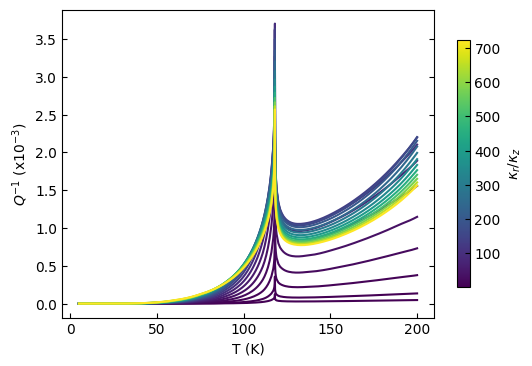

In [153]:
cmap = plt.get_cmap('viridis')
norm = pltc.Normalize(vmin=f_kr_kz[0], vmax=1/f_kr_kz[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
for i in range(20):
#ax.plot(T, Q_rz*1000,label='iso')
    ax.plot(T,Q_RZ_TENSION_ANISOTROPIC[i]*1000, color=cmap(norm(1/f_kr_kz[i])))
#ax.scatter(T_data, diss_data*10**3,marker='o', s=25, facecolor='none',edgecolor='k')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
cbar = fig.colorbar(sm, ax=ax, label=r'$\kappa_r/\kappa_z$', shrink=0.8)
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

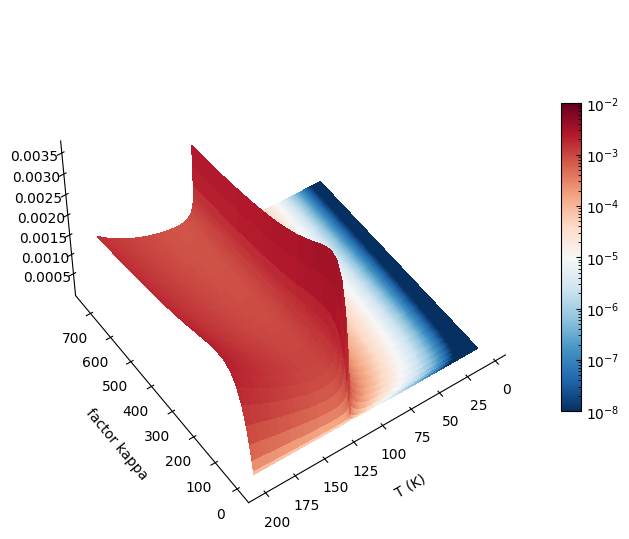

In [154]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(8,8))
# Make data.
X, Y = np.meshgrid(1/np.array(f_kr_kz), T)
# Plot the surface.
surf = ax.plot_surface(Y, X,(np.array(Q_RZ_TENSION_ANISOTROPIC[:][:])).T, cmap='RdBu_r',
                       linewidth=0, antialiased=False, rcount=600, ccount=600, norm=pltc.LogNorm(vmin=10**(-8), vmax=10**(-2)))
ax.view_init(azim=-65+120, elev=50)

#y_ticks = [-9,-8,-7]  # Define the tick positions
y_tick_labels = ['$10^{-9}$','$10^{-8}$','$10^{-7}$']
#ax.set_yticks(y_ticks)
#ax.set_yticklabels(y_tick_labels)
#ax.set_ylim(-9.1,-6.9)

#z_ticks = [0.001]  # Define the tick positions
#z_tick_labels = ['o']
#ax.set_zticks(z_ticks)
#ax.set_zticklabels(z_tick_labels)

ax.set_xlabel('T (K)', labelpad=10)
ax.set_ylabel('factor kappa', labelpad=10)

ax.invert_yaxis()

ax.grid(False)
colorbar=fig.colorbar(surf, shrink=0.5, aspect=15)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\thickness_depQ.pdf')
plt.show()

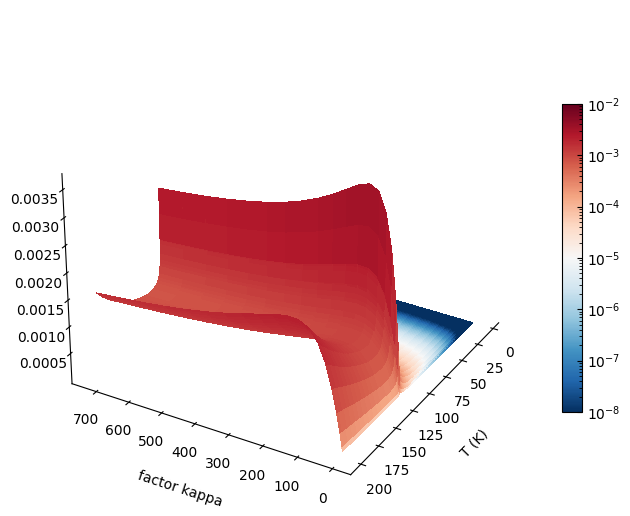

In [155]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(8,8))
# Make data.
X, Y = np.meshgrid(1/np.array(f_kr_kz), T)
# Plot the surface.
surf = ax.plot_surface(Y, X,(np.array(Q_RZ_TENSION_ANISOTROPIC[:][:])).T, cmap='RdBu_r',
                       linewidth=0, antialiased=False, rcount=600, ccount=600, norm=pltc.LogNorm(vmin=10**(-8), vmax=10**(-2)))
ax.view_init(azim=30, elev=30)

#y_ticks = [-9,-8,-7]  # Define the tick positions
y_tick_labels = ['$10^{-9}$','$10^{-8}$','$10^{-7}$']
#ax.set_yticks(y_ticks)
#ax.set_yticklabels(y_tick_labels)
#ax.set_ylim(-9.1,-6.9)

#z_ticks = [0.001]  # Define the tick positions
#z_tick_labels = ['o']
#ax.set_zticks(z_ticks)
#ax.set_zticklabels(z_tick_labels)

ax.set_xlabel('T (K)', labelpad=10)
ax.set_ylabel('factor kappa', labelpad=10)

ax.invert_yaxis()

ax.grid(False)
colorbar=fig.colorbar(surf, shrink=0.5, aspect=15)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#plt.savefig(r'C:\Users\alvar\OneDrive - Delft University of Technology\Documents\_TUDelft\3. MASTER THESIS\plots\FePS3\thickness_depQ.pdf')
plt.show()

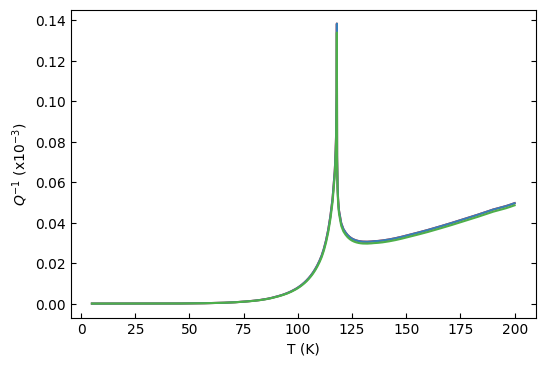

In [156]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(T, Q_Z_TENSION *1000)
ax.plot(T, Q_Z_TENSION2 *1000)
ax.plot(T, Q_Z_TENSION_ANIS_LIMIT *1000)
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.show()

### Thickness check
A very important parameter for TED is the thickness as the Zener model predicts that for thicker sasmples you'll have more dissipation.
We observed less disipation for isotropic 2D model. So we'll see now where this applies. 

In [157]:
Q_Z_30, w0_30 = dis.dissipation_z_tension(30*10**-9, r, nu, E, rho_, T, c_v_, kappa, alpha, pretension)
Q_RZ_ISO_30 , w0_30 = dis.dissipation_kz_kr_tension_anis(30*10**-9, r, nu, E, rho_, T, c_v_, kappa, kappa, alpha, pretension, 200)
Q_R_30 , w0_30 = dis.dissipation_kz_kr_tension_anis(30*10**-9, r, nu, E, rho_, T, c_v_, kappa/1000, kappa, alpha, pretension, 200)

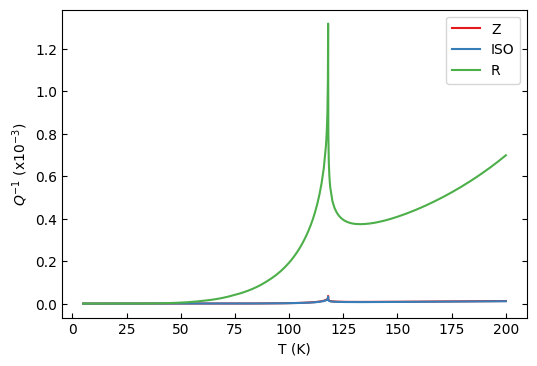

In [158]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(T, Q_Z_30*1000, label='Z')
ax.plot(T, Q_RZ_ISO_30 *1000,label='ISO')
ax.plot(T, Q_R_30 *1000, label='R')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.legend()
plt.show()

NameError: name 'Q_Z_5' is not defined

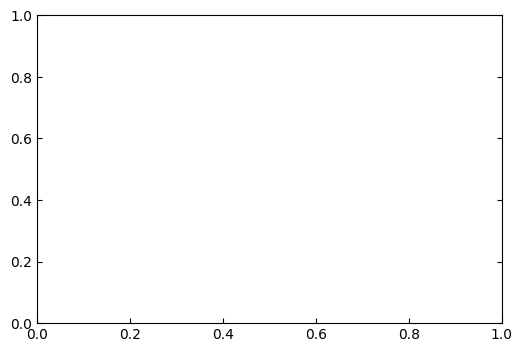

In [159]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(T, Q_Z_5*1000, label='Z')
ax.plot(T, Q_RZ_ISO_5 *1000,label='ISO')
#ax.plot(T, Q_R_5 *1000, label='R')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.legend()
plt.show()

In [160]:
t2 = 160*10**-9
Q_Z_2, w0_2 = dis.dissipation_z_tension(t2, r, nu, E, rho_, T, c_v_, kappa, alpha, pretension)
Q_RZ_ISO_2 , w0_2 = dis.dissipation_kz_kr_tension_anis(t2, r, nu, E, rho_, T, c_v_, kappa, kappa, alpha, pretension, 200)
Q_R_2 , w0_2 = dis.dissipation_kz_kr_tension_anis(t2, r, nu, E, rho_, T, c_v_, kappa/800, kappa, alpha, pretension, 200)

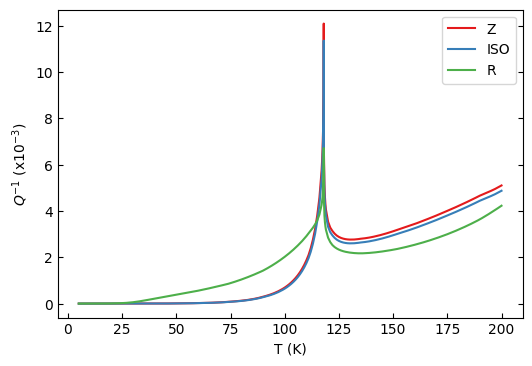

In [161]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(T, Q_Z_2*1000, label='Z')
ax.plot(T, Q_RZ_ISO_2 *1000,label='ISO')
ax.plot(T, Q_R_2 *1000, label='R')
ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.legend()
plt.show()

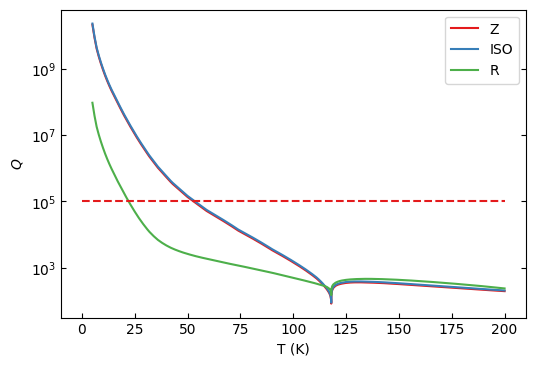

In [162]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(T, Q_Z_2**-1, label='Z')
ax.plot(T, Q_RZ_ISO_2**-1,label='ISO')
ax.plot(T, Q_R_2 **-1, label='R')
ax.set_ylabel(r'$Q$')
ax.set_xlabel('T (K)')
ax.set_yscale('log')
ax.hlines(10**5,0,200,linestyles='dashed')
plt.legend()
plt.show()

In [163]:
t = [30, 50, 70, 90, 110, 130]
Q_Z_t = []
Q_RZ_ISO_t = []
Q_R_t = []

for tt, thick in enumerate(t):
    thick = thick*10**-9
    Q_Z_temp, _ = dis.dissipation_z_tension(thick, r, nu, E, rho_, T, c_v_, kappa, alpha, pretension)
    Q_RZ_temp , _ = dis.dissipation_kz_kr_tension_anis(thick, r, nu, E, rho_, T, c_v_, kappa, kappa, alpha, pretension, 200)
    Q_R_temp , _ = dis.dissipation_kz_kr_tension_anis(thick, r, nu, E, rho_, T, c_v_, kappa/1000, kappa, alpha, pretension, 200)
    Q_Z_t.append(Q_Z_temp)
    Q_RZ_ISO_t.append(Q_RZ_temp)
    Q_R_t.append(Q_R_temp)

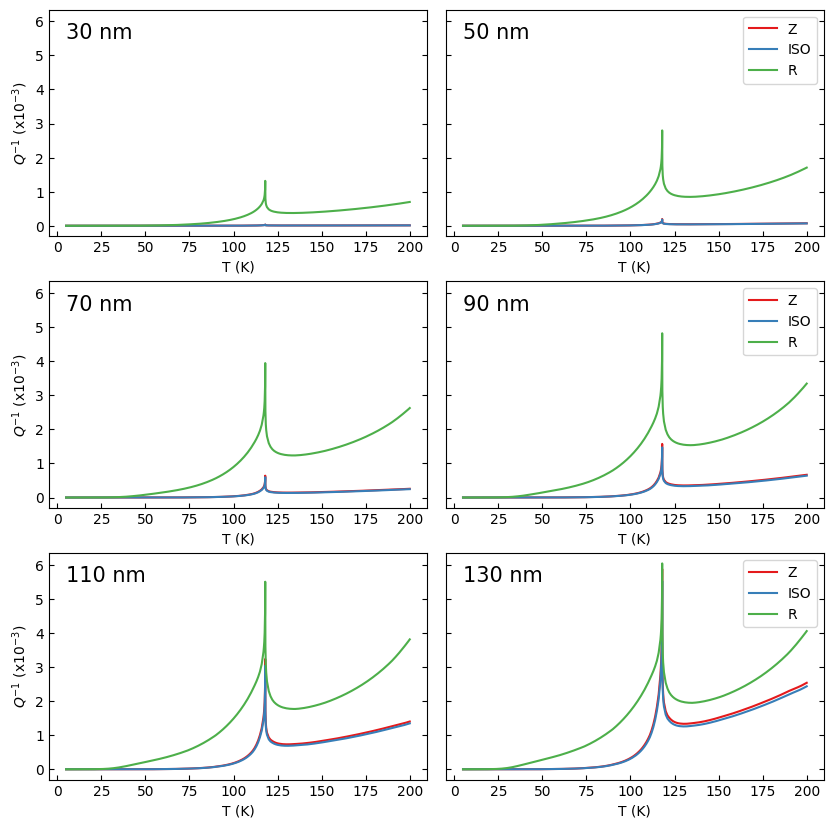

In [164]:
fig, ax = plt.subplots(3,2,figsize=(10,10), sharey=True)

ax[0][0].plot(T, Q_Z_t[0]*1000, label='Z')
ax[0][0].plot(T, Q_RZ_ISO_t[0] *1000,label='ISO')
ax[0][0].plot(T, Q_R_t[0] *1000, label='R')
ax[0][0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[0][0].set_xlabel('T (K)')
ax[0][0].text(5,5.5,str(t[0])+' nm', fontsize=15)

ax[0][1].plot(T, Q_Z_t[1]*1000, label='Z')
ax[0][1].plot(T, Q_RZ_ISO_t[1] *1000,label='ISO')
ax[0][1].plot(T, Q_R_t[1] *1000, label='R')
ax[0][1].set_xlabel('T (K)')
ax[0][1].text(5,5.5,str(t[1])+' nm', fontsize=15)
ax[0][1].legend()

ax[1][0].plot(T, Q_Z_t[2]*1000, label='Z')
ax[1][0].plot(T, Q_RZ_ISO_t[2] *1000,label='ISO')
ax[1][0].plot(T, Q_R_t[2] *1000, label='R')
ax[1][0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[1][0].set_xlabel('T (K)')
ax[1][0].text(5,5.5,str(t[2])+' nm', fontsize=15)

ax[1][1].plot(T, Q_Z_t[3]*1000, label='Z')
ax[1][1].plot(T, Q_RZ_ISO_t[3] *1000,label='ISO')
ax[1][1].plot(T, Q_R_t[3] *1000, label='R')
ax[1][1].set_xlabel('T (K)')
ax[1][1].text(5,5.5,str(t[3])+' nm', fontsize=15)
ax[1][1].legend()

ax[2][0].plot(T, Q_Z_t[4]*1000, label='Z')
ax[2][0].plot(T, Q_RZ_ISO_t[4] *1000,label='ISO')
ax[2][0].plot(T, Q_R_t[4] *1000, label='R')
ax[2][0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[2][0].set_xlabel('T (K)')
ax[2][0].text(5,5.5,str(t[4])+' nm', fontsize=15)

ax[2][1].plot(T, Q_Z_t[5]*1000, label='Z')
ax[2][1].plot(T, Q_RZ_ISO_t[5] *1000,label='ISO')
ax[2][1].plot(T, Q_R_t[5] *1000, label='R')
ax[2][1].set_xlabel('T (K)')
ax[2][1].text(5,5.5,str(t[5])+' nm', fontsize=15)
plt.tight_layout
plt.legend()
plt.subplots_adjust(wspace=0.05)
plt.show()

In [165]:
rad = [2, 4, 6, 8]
Q_Z_t = []
Q_RZ_ISO_t = []
Q_R_t = []

for tt, radd in enumerate(rad):
    radd = radd*10**-6
    Q_Z_temp, _ = dis.dissipation_z_tension(thickness, radd, nu, E, rho_, T, c_v_, kappa, alpha, pretension)
    Q_RZ_temp , _ = dis.dissipation_kz_kr_tension_anis(thickness, radd, nu, E, rho_, T, c_v_, kappa, kappa, alpha, pretension, 200)
    Q_R_temp , _ = dis.dissipation_kz_kr_tension_anis(thickness, radd, nu, E, rho_, T, c_v_, kappa/1000, kappa, alpha, pretension, 200)
    Q_Z_t.append(Q_Z_temp)
    Q_RZ_ISO_t.append(Q_RZ_temp)
    Q_R_t.append(Q_R_temp)

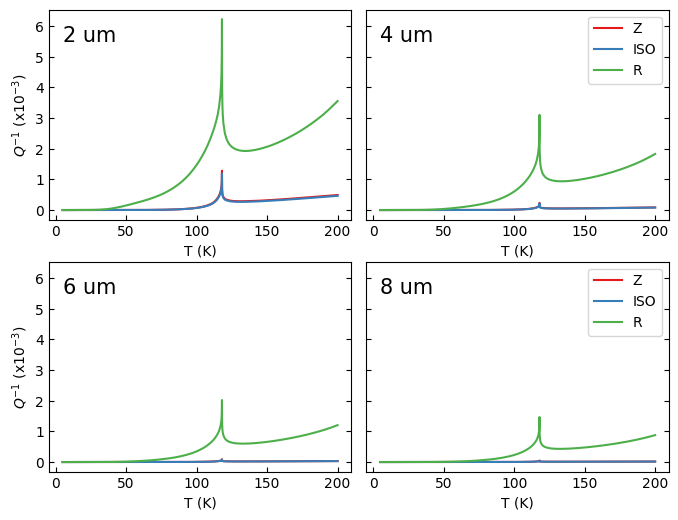

In [166]:
fig, ax = plt.subplots(2,2,figsize=(8,6), sharey=True)

ax[0][0].plot(T, Q_Z_t[0]*1000, label='Z')
ax[0][0].plot(T, Q_RZ_ISO_t[0] *1000,label='ISO')
ax[0][0].plot(T, Q_R_t[0] *1000, label='R')
ax[0][0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[0][0].set_xlabel('T (K)')
ax[0][0].text(5,5.5,str(rad[0])+' um', fontsize=15)

ax[0][1].plot(T, Q_Z_t[1]*1000, label='Z')
ax[0][1].plot(T, Q_RZ_ISO_t[1] *1000,label='ISO')
ax[0][1].plot(T, Q_R_t[1] *1000, label='R')
ax[0][1].set_xlabel('T (K)')
ax[0][1].text(5,5.5,str(rad[1])+' um', fontsize=15)
ax[0][1].legend()

ax[1][0].plot(T, Q_Z_t[2]*1000, label='Z')
ax[1][0].plot(T, Q_RZ_ISO_t[2] *1000,label='ISO')
ax[1][0].plot(T, Q_R_t[2] *1000, label='R')
ax[1][0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[1][0].set_xlabel('T (K)')
ax[1][0].text(5,5.5,str(rad[2])+' um', fontsize=15)

ax[1][1].plot(T, Q_Z_t[3]*1000, label='Z')
ax[1][1].plot(T, Q_RZ_ISO_t[3] *1000,label='ISO')
ax[1][1].plot(T, Q_R_t[3] *1000, label='R')
ax[1][1].set_xlabel('T (K)')
ax[1][1].text(5,5.5,str(rad[3])+' um', fontsize=15)
ax[1][1].legend()

plt.tight_layout
plt.legend()
plt.subplots_adjust(wspace=0.05)
plt.show()

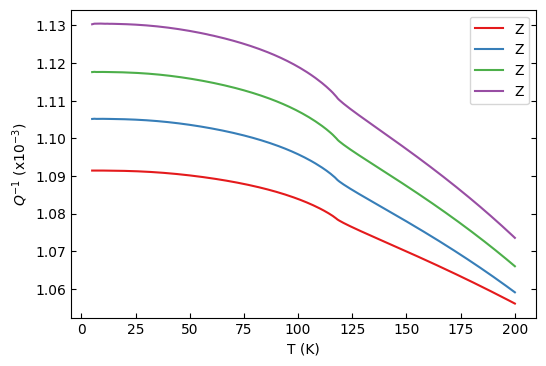

In [167]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)
ax.plot(T, Q_Z_t[0]/Q_RZ_ISO_t[0], label='Z')
ax.plot(T, Q_Z_t[1]/Q_RZ_ISO_t[1], label='Z')
ax.plot(T, Q_Z_t[2]/Q_RZ_ISO_t[2], label='Z')
ax.plot(T, Q_Z_t[3]/Q_RZ_ISO_t[3], label='Z')

ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('T (K)')
plt.legend()
plt.show()

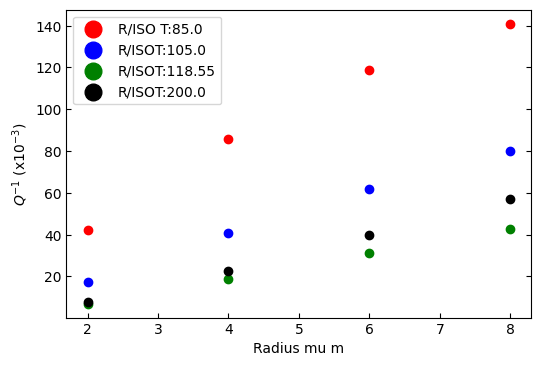

In [168]:
fig, ax = plt.subplots(1,1,figsize=(6,4), sharey=True)

x1=80
ax.scatter(2, Q_R_t[0][x1]/Q_RZ_ISO_t[0][x1], label='R/ISO T:'+str(T[x1]), c='r')
ax.scatter(4, Q_R_t[1][x1]/Q_RZ_ISO_t[1][x1], c='r')
ax.scatter(6, Q_R_t[2][x1]/Q_RZ_ISO_t[2][x1], c='r')
ax.scatter(8, Q_R_t[3][x1]/Q_RZ_ISO_t[3][x1], c='r')

x2=100
ax.scatter(2, Q_R_t[0][x2]/Q_RZ_ISO_t[0][x2], label='R/ISOT:'+str(T[x2]), c='b')
ax.scatter(4, Q_R_t[1][x2]/Q_RZ_ISO_t[1][x2], c='b')
ax.scatter(6, Q_R_t[2][x2]/Q_RZ_ISO_t[2][x2], c='b')
ax.scatter(8, Q_R_t[3][x2]/Q_RZ_ISO_t[3][x2], c='b')

x3=120
c3='g'
ax.scatter(2, Q_R_t[0][x3]/Q_RZ_ISO_t[0][x3], label='R/ISOT:'+str(T[x3]), c=c3)
ax.scatter(4, Q_R_t[1][x3]/Q_RZ_ISO_t[1][x3], c=c3)
ax.scatter(6, Q_R_t[2][x3]/Q_RZ_ISO_t[2][x3], c=c3)
ax.scatter(8, Q_R_t[3][x3]/Q_RZ_ISO_t[3][x3], c=c3)

x4=-1
c4='k'
ax.scatter(2, Q_R_t[0][x4]/Q_RZ_ISO_t[0][x4], label='R/ISOT:'+str(T[x4]), c=c4)
ax.scatter(4, Q_R_t[1][x4]/Q_RZ_ISO_t[1][x4], c=c4)
ax.scatter(6, Q_R_t[2][x4]/Q_RZ_ISO_t[2][x4], c=c4)
ax.scatter(8, Q_R_t[3][x4]/Q_RZ_ISO_t[3][x4], c=c4)

ax.set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax.set_xlabel('Radius mu m')
plt.legend()
plt.show()

### Currys derivation to compare with my R model

In [169]:
thickness, r

(4.5000000000000006e-08, 4.9999999999999996e-06)

In [170]:
Q_curry = dis.dissipation_r_curry(thickness, r, nu, E, rho_, T, c_v_, kappa, alpha, pretension)
plt.plot(T, Q_curry**-1*1000)
plt.ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
plt.xlabel('T (K)')

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

IndexError: list index out of range

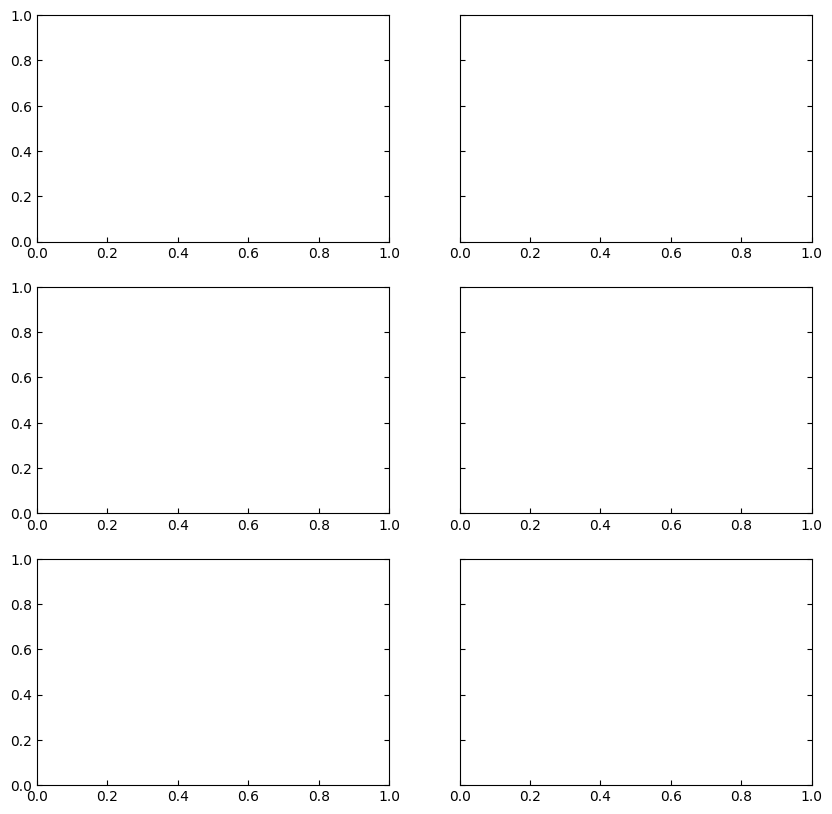

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(10,10), sharey=True)

ax[0][0].plot(T, Q_Z_t[0]*1000, label='Z')
ax[0][0].plot(T, Q_RZ_ISO_t[0] *1000,label='ISO')
ax[0][0].plot(T, Q_R_t[0] *1000, label='R')

ax[0][0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[0][0].set_xlabel('T (K)')
ax[0][0].text(5,5.5,str(t[0])+' nm', fontsize=15)

ax[0][1].plot(T, Q_Z_t[1]*1000, label='Z')
ax[0][1].plot(T, Q_RZ_ISO_t[1] *1000,label='ISO')
ax[0][1].plot(T, Q_R_t[1] *1000, label='R')
#ax[0][1].plot(T, Q_curry**-1*1000)
ax[0][1].set_xlabel('T (K)')
ax[0][1].text(5,5.5,str(t[1])+' nm', fontsize=15)
ax[0][1].legend()

ax[1][0].plot(T, Q_Z_t[2]*1000, label='Z')
ax[1][0].plot(T, Q_RZ_ISO_t[2] *1000,label='ISO')
ax[1][0].plot(T, Q_R_t[2] *1000, label='R')
ax[1][0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[1][0].set_xlabel('T (K)')
ax[1][0].text(5,5.5,str(t[2])+' nm', fontsize=15)

ax[1][1].plot(T, Q_Z_t[3]*1000, label='Z')
ax[1][1].plot(T, Q_RZ_ISO_t[3] *1000,label='ISO')
ax[1][1].plot(T, Q_R_t[3] *1000, label='R')
ax[1][1].set_xlabel('T (K)')
ax[1][1].text(5,5.5,str(t[3])+' nm', fontsize=15)
ax[1][1].legend()

ax[2][0].plot(T, Q_Z_t[4]*1000, label='Z')
ax[2][0].plot(T, Q_RZ_ISO_t[4] *1000,label='ISO')
ax[2][0].plot(T, Q_R_t[4] *1000, label='R')
ax[2][0].set_ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
ax[2][0].set_xlabel('T (K)')
ax[2][0].text(5,5.5,str(t[4])+' nm', fontsize=15)

ax[2][1].plot(T, Q_Z_t[5]*1000, label='Z')
ax[2][1].plot(T, Q_RZ_ISO_t[5] *1000,label='ISO')
ax[2][1].plot(T, Q_R_t[5] *1000, label='R')
ax[2][1].set_xlabel('T (K)')
ax[2][1].text(5,5.5,str(t[5])+' nm', fontsize=15)
plt.tight_layout
plt.legend()
plt.subplots_adjust(wspace=0.05)
plt.show()

In [ ]:
Q_curry = dis.dissipation_r_curry(thickness, r, nu, E, rho_, T, c_v_, kappa, alpha, pretension)
plt.plot(T, Q_curry**-1*1000)
plt.ylabel(r'$Q^{-1}$ (x$10^{-3}$)')
plt.xlabel('T (K)')
plt.plot(T,Q_RZ_TENSION_ANISOTROPIC[0]*1000, color=cmap(norm(1/f_kr_kz[i])))

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [193]:
omega_tau_z = []
f_kr_kz2 = []
for i in range(20):
    f = 1 / (2*i**2+1)
    f_kr_kz2.append(f)
    omega_tau_z.append(w0*c_v_*thickness**2*rho_/(np.pi*kappa_fe_exp*f))

omega_tau_r = w0*c_v_*r**2*rho_/(5*kappa_fe_exp)

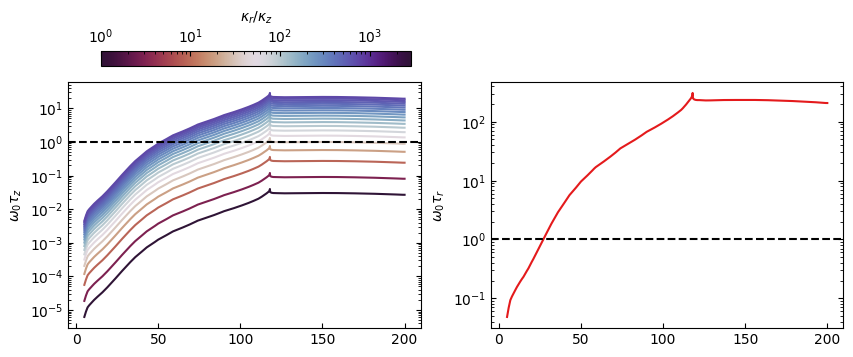

In [210]:
cmap = plt.get_cmap('twilight_shifted_r')
norm = pltc.LogNorm(vmin=f_kr_kz2[0], vmax=1/f_kr_kz2[-1]*4)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(1,2,figsize=(10,4))
for i in range(len(f_kr_kz2)):
    ax[0].plot(T,omega_tau_z[i], color=cmap(norm(1/f_kr_kz2[i])))
   
ax[1].plot(T,omega_tau_r)

ax[0].axhline(y=1,xmin=0,xmax=200, c='k', linestyle='--')
ax[1].axhline(y=1,xmin=0,xmax=200, c='k', linestyle='--')

ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.colorbar(sm,ax=ax[:],label='$\kappa_r/\kappa_z$',location='top', shrink=0.4, anchor=(0.07,0))
ax[0].set_ylabel(r'$\omega_0\tau_z$')
ax[1].set_ylabel(r'$\omega_0\tau_r$')
plt.show()